In [1]:
%run InitialDataCleanup.ipynb
IPython.display.clear_output()

In [2]:
df = result
df.tail()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined,bg_posts_ss60,bg_posts_ss70,case_count,death_count,revenue_ss60,revenue_ss70,spend_acf,spend_hcs
2021-02-18,15502.285714,176486.714286,19964.142857,788602.428571,-0.164429,-0.267286,633932.0,16243.0,-0.443,-0.646,-0.207,-0.117
2021-02-19,14939.142857,172657.857143,19063.571429,847249.714286,-0.160000,-0.276000,635349.0,16265.0,-0.377,-0.647,-0.211,-0.216
2021-02-20,14376.000000,168829.000000,18163.000000,905897.000000,-0.145086,-0.250857,636167.0,16332.0,-0.398,-0.645,-0.203,-0.177
2021-02-21,13964.714286,170170.000000,17786.857143,776483.142857,-0.130171,-0.225714,636177.0,16332.0,-0.392,-0.647,-0.181,-0.152
2021-02-28,11497.000000,178216.000000,15530.000000,0.000000,-0.074571,-0.110571,645411.0,16498.0,-0.351,-0.612,-0.157,-0.104


In [3]:
#target_names = ['contclaims_count_regular']
target_names = list(df.columns)

In [4]:
split_fraction = 0.7
train_split = int(split_fraction * int(df.shape[0]))
step = 1

past = 20
future = 1
learning_rate = 0.001
batch_size = 12

sequence_length = int(past / step)

In [5]:
titles = list(df.columns)
features = df[titles]
features.head()

,initclaims_count_regular,contclaims_count_regular,initclaims_count_combined,contclaims_count_combined,bg_posts_ss60,bg_posts_ss70,case_count,death_count,revenue_ss60,revenue_ss70,spend_acf,spend_hcs
2020-03-07,5150.000000,77661.0,5150.000000,77661.0,0.072643,0.0837,0.0,0.0,0.0546,-0.0413,-0.0310,-0.01550
2020-03-08,5176.857143,77389.0,5176.857143,77389.0,0.063086,0.0714,0.0,0.0,0.1010,-0.0357,-0.0269,0.00977
2020-03-09,5203.714286,77117.0,5203.714286,77117.0,0.053529,0.0591,0.0,0.0,0.0707,-0.0370,-0.0243,-0.01230
2020-03-10,5230.571429,76845.0,5230.571429,76845.0,0.043971,0.0468,2.0,0.0,0.0271,-0.0430,-0.0102,0.19000
2020-03-11,5257.428571,76573.0,5257.428571,76573.0,0.034414,0.0345,2.0,0.0,0.0279,-0.0489,-0.0144,0.21700


In [6]:
start = past + future
end = start + train_split

x_data = features.values[0: -start]
y_data = features[target_names].values[start:]

x_train = x_data[:train_split]
x_val = x_data[train_split:]

y_train = y_data[:train_split]
y_val = y_data[train_split:]

x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_val_scaled = x_scaler.transform(x_val)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)

len(x_train) + len(x_val), len(y_train) + len(y_val), len(features)

(332, 332, 353)

In [7]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train_scaled,
    y_train_scaled,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [8]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val_scaled,
    y_val_scaled,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [9]:
for batch in dataset_train.take(1):
    inputs, targets = batch
print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

print('dataset val')
i = 0
for j in dataset_val:
    x, y = j
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    i = i + 1

print(f'length of x_val: {len(x_val)}')
print(f'length of validation data: {len(dataset_val)}')
print(f'number of batches: {i}')

Input shape: (12, 20, 12)
Target shape: (12, 12)
dataset val
x shape: (12, 20, 12)
y shape: (12, 12)
x shape: (12, 20, 12)
y shape: (12, 12)
x shape: (12, 20, 12)
y shape: (12, 12)
x shape: (12, 20, 12)
y shape: (12, 12)
x shape: (12, 20, 12)
y shape: (12, 12)
x shape: (6, 20, 12)
y shape: (6, 12)
length of x_val: 85
length of validation data: 6
number of batches: 6


In [10]:
model = tf.keras.Sequential([
    keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])),
    keras.layers.LSTM(32, activation='tanh'),
    keras.layers.Dense(len(target_names))
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5760      
_________________________________________________________________
dense (Dense)                (None, 12)                396       
Total params: 6,156
Trainable params: 6,156
Non-trainable params: 0
_________________________________________________________________


In [11]:

%load_ext tensorboard
import os
import shutil
from datetime import datetime

path_checkpoint = "covid_model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

epochs = 50

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

if os.path.exists('./logs'):
    shutil.rmtree('./logs/')
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback, tensorboard_callback],
)

Epoch 1/50
 1/19 [>.............................] - ETA: 0s - loss: 0.2032WARNING:tensorflow:From C:\Users\salwa\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
16/19 [========================>.....] - ETA: 0s - loss: 0.220 - ETA: 0s - loss: 0.219 - ETA: 0s - loss: 0.1990
Epoch 00001: val_loss improved from inf to 0.43541, saving model to covid_model_checkpoint.h5
19/19 [==============================] - 2s 97ms/step - loss: 0.1906 - val_loss: 0.4354
Epoch 2/50
18/19 [===========================>..] - ETA: 0s - loss: 0.099 - ETA: 0s - loss: 0.071 - ETA: 0s - loss: 0.070 - ETA: 0s - loss: 0.059 - ETA: 0s - loss: 0.055 - ETA: 0s - loss: 0.0526
Epoch 00002: val_loss improved from 0.43541 to 0.33290, saving model to covid_model_checkpoint.h5
19/19 [==============================] - 1s 32ms/step - l

Epoch 00022: val_loss improved from 0.10794 to 0.10741, saving model to covid_model_checkpoint.h5
19/19 [==============================] - 1s 28ms/step - loss: 0.0066 - val_loss: 0.1074
Epoch 23/50
17/19 [=========================>....] - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.0064
Epoch 00023: val_loss improved from 0.10741 to 0.10689, saving model to covid_model_checkpoint.h5
19/19 [==============================] - 1s 29ms/step - loss: 0.0064 - val_loss: 0.1069
Epoch 24/50
16/19 [========================>.....] - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.0064
Epoch 00024: val_loss improved from 0.10689 to 0.10635, saving model to covid_model_checkpoint.h5
19/19 [==============================] - 1s 30ms/step - loss: 0.0063 - val_loss: 0.1063
Epoch 25/50
19/19 [==============================] - ETA: 0s - loss: 0.009

18/19 [===========================>..] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.0053
Epoch 00045: val_loss did not improve from 0.08705
19/19 [==============================] - 1s 30ms/step - loss: 0.0053 - val_loss: 0.0871
Epoch 46/50
18/19 [===========================>..] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.0051
Epoch 00046: val_loss improved from 0.08705 to 0.08434, saving model to covid_model_checkpoint.h5
19/19 [==============================] - 1s 32ms/step - loss: 0.0051 - val_loss: 0.0843
Epoch 47/50
18/19 [===========================>..] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.0051
Epoch 00047: val_loss did not improve from 0.08434
19/19 [==============================] - 1s 29ms

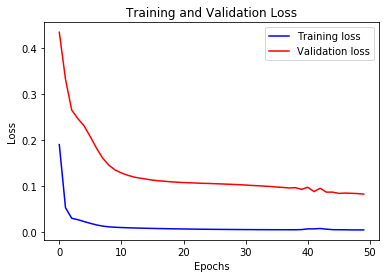

In [12]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [13]:
result = model.evaluate(x=np.expand_dims(x_val_scaled[-past:], axis=0),
                        y=np.expand_dims(y_val_scaled[-past:], axis=0))

1/1 [==============================] - ETA: 0s - loss: 0.148 - 0s 27ms/step - loss: 0.1480


In [14]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 2) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return

Prediction: [ 3.4264441e+04  1.5416092e+05  8.1108148e+04  1.0859010e+06
 -3.7927607e-01 -5.0637424e-01  3.3096481e+05  6.6434834e+03
 -2.0139538e-01 -6.3703734e-01 -2.9228231e-01 -2.9532942e-01]


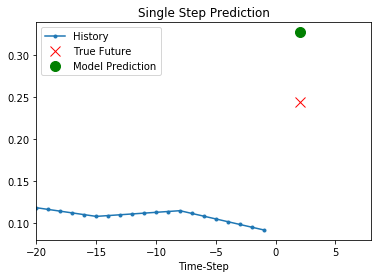

Prediction: [ 1.6892842e+04  1.9070961e+05  8.4544945e+04  1.3607554e+06
 -3.9758608e-01 -5.1902097e-01  3.6388491e+05  6.7396968e+03
 -2.0809807e-01 -6.4154553e-01 -2.9656786e-01 -2.3971975e-01]


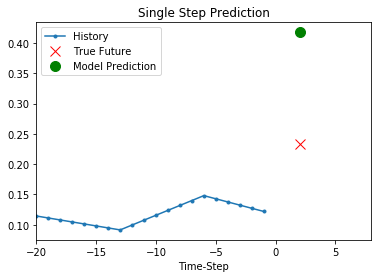

In [15]:
for x, y in dataset_val.take(2):
    #print('Y:', y_scaler.inverse_transform(y)[0])
    prediction = model.predict(x)
    #print('pred shape:', prediction.shape)
    print('Prediction:', y_scaler.inverse_transform(prediction)[0])
    show_plot(
        [x[0][:, 1].numpy(), y[0][3].numpy(), prediction[0][3]],
        2,
        "Single Step Prediction",
    )

In [16]:
DAYS_TO_PREDICT = 30

features_pred = df[-20:].to_numpy()
last_df = df[-1:]
pre_covid_ui_claims = 72103
print(f'pre-covid UI claims {pre_covid_ui_claims}')
num_of_days = 0
last_date = df[-1:].index.date[0]
print('last date in the dataset:', last_date)
print(f'UI claims on the last day {last_date}: {df[-1:]["contclaims_count_combined"]}')
preds = []
for i in range(DAYS_TO_PREDICT):
    x_pred_scaled = x_scaler.transform(features_pred)
    dataset_pred = keras.preprocessing.timeseries_dataset_from_array(
        x_pred_scaled,
        None,
        sequence_length=sequence_length,
        sampling_rate=step,
        batch_size=batch_size,
    )

    for batch in dataset_pred.take(1):
        x = batch
    pred = model.predict(x)
    preds.append(pred[0])
    num_of_days = num_of_days + 1
    pred_ui_claims = y_scaler.inverse_transform(pred)[0][3]
    if (pred_ui_claims <= pre_covid_ui_claims):
        print(f'predicted UI claims {pred_ui_claims} is less than or equal to pre-covid level {pre_covid_ui_claims} after {num_of_days} days')
        break
    else:
        print(f'predicted value {pred_ui_claims} not meeting the threshold after {num_of_days} days')
    pred_actual = y_scaler.inverse_transform(pred)
    features_pred  = np.vstack([features_pred, pred_actual])
    features_pred = features_pred[1:]

print('Done...')

pre-covid UI claims 72103
last date in the dataset: 2021-02-28
UI claims on the last day 2021-02-28: 2021-02-28    0.0
Name: contclaims_count_combined, dtype: float64
predicted value 1329635.0 not meeting the threshold after 1 days
predicted value 1347432.875 not meeting the threshold after 2 days
predicted value 1354753.25 not meeting the threshold after 3 days
predicted value 1333562.625 not meeting the threshold after 4 days
predicted value 1306293.375 not meeting the threshold after 5 days
predicted value 1278076.75 not meeting the threshold after 6 days
predicted value 1251199.0 not meeting the threshold after 7 days
predicted value 1226757.125 not meeting the threshold after 8 days
predicted value 1205110.125 not meeting the threshold after 9 days
predicted value 1186357.375 not meeting the threshold after 10 days
predicted value 1170116.75 not meeting the threshold after 11 days
predicted value 1156307.125 not meeting the threshold after 12 days
predicted value 1144738.0 not mee

In [17]:
predicted_ui_claims = y_scaler.inverse_transform(preds)

pred_arr = []
for i in range(len(predicted_ui_claims)):
    pred_arr.append(predicted_ui_claims[i][3])
    
predicted_index = pd.date_range(
  start=df.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_ui = pd.Series(
  data=pred_arr,
  index=predicted_index
)

In [23]:
selected_cols=['contclaims_count_combined']
ui_claims_feb = prepare_data('UI Claims - State - Weekly.csv', day='day_endofweek', start_date='2021-01-30', end_date='2021-02-27', selected_cols=selected_cols, interpolate=True)
ui_claims_feb = ui_claims_feb[1:]
ui_claims_feb.head()

,contclaims_count_combined
2021-01-31,530714.571429
2021-02-01,589640.142857
2021-02-02,648565.714286
2021-02-03,707491.285714
2021-02-04,766416.857143


In [24]:
predicted_ui.head()

2021-03-01    1.329635e+06
2021-03-02    1.347433e+06
2021-03-03    1.354753e+06
2021-03-04    1.333563e+06
2021-03-05    1.306293e+06
Freq: D, dtype: float64

C:\Users\salwa\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


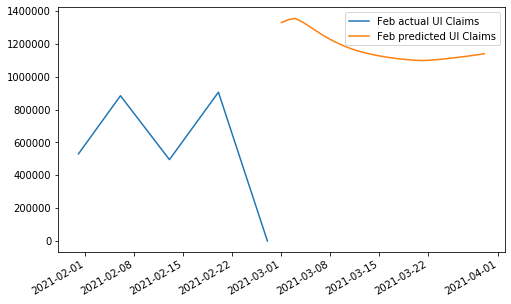

In [25]:
import matplotlib.dates as mdates

plt.figure(figsize=(8,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.plot(ui_claims_feb, label='Feb actual UI Claims')
plt.plot(predicted_ui, label='Feb predicted UI Claims')
plt.legend()